<a href="https://colab.research.google.com/github/hamuntech/Credit-Scoring-using-Trees-RForest-XGBoost/blob/main/Credit_Scoring_Trees_RForest_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This is a binary classification problem. The target is positive (“1”) if the customer defaults and negative (“0”) otherwise.
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**Data preparation**

In [ ]:
df = pd.read_csv('CreditScoring.csv')

In [ ]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Convert categorical variables that are represented by numbers to categorical. Otherwise, DictVectorizer may consider these as numeric fields

In [ ]:
#Status variable conversion
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [ ]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [ ]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [ ]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


Resolve Numeric Variables Issues

In [ ]:
df.describe() #Note that describe function is based on numeric values and operations

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [ ]:
df.describe().round() #Remove the fractional part and round to integer. Note that missing values in the dataset are encoded as 99999999.0

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [ ]:
#Lets replace 99999999.0 values to Numpy NAN (Not a Number) values so that these are not taken into account while making calculations
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [ ]:
#Check null values. No nulls in the target "status"
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [ ]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Target Variable

In [ ]:
df.status.value_counts() #Note that number of examples for unk = 1 in the dataset. Thus, this value is not useful as it will not add any value to training/predictions

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [ ]:
df = df[df.status != 'unk']

In [ ]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [ ]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [ ]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [ ]:
df_train.status.head(2)

951    default
688    default
Name: status, dtype: object

In [ ]:
y_train = (df_train.status == 'default').values #Training dataset labels
y_val = (df_val.status == 'default').values #Validation dataset lables

In [ ]:
y_train[:2]

array([ True,  True])

In [ ]:
del df_train['status']
del df_val['status']

In [ ]:
df_train.isnull().sum() #Missing values

seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

In [ ]:
#Fill missing values with 0
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [ ]:
df_train.isnull().sum() #No more missing values

seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

One-hot-encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dict_train = df_train.to_dict(orient='records') #Because DictVectorizer accepts dictionaries
dict_val = df_val.to_dict(orient='records')

In [ ]:
dict_train[0]

{'age': 36,
 'amount': 1000,
 'assets': 10000.0,
 'debt': 0.0,
 'expenses': 75,
 'home': 'owner',
 'income': 0.0,
 'job': 'freelance',
 'marital': 'married',
 'price': 1400,
 'records': 'no',
 'seniority': 10,
 'time': 36}

In [ ]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train) #Dictionaries are fed to DictVectorizer to get one-hot-encoded training and validation datasets
X_val = dv.transform(dict_val)

In [ ]:
dv.get_feature_names()

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

**Decision trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Perfect ROC AUC Score on training
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [ ]:
#Validation has just 65% score
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6637281732096583

In [ ]:
#Overfitting, thus lets reduce the tree depth to 2

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


Parameter Tuning: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DecisionTreeClassifier(max_depth=6)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [ ]:
roc_auc_score(y_val, y_pred)

0.757780145794483

In [ ]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.744
  10 -> 0.695
  15 -> 0.658
  20 -> 0.655
None -> 0.657


In [ ]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759


In [ ]:
for m in [4, 5, 6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747
depth: 5
1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.773
20 -> 0.774
50 -> 0.767
100 -> 0.763
200 -> 0.759
depth: 6
1 -> 0.749
5 -> 0.762
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.772
100 -> 0.776
200 -> 0.768


In [ ]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.747
5 -> 0.760
10 -> 0.778
15 -> 0.786
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768


In [ ]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred)
print(auc_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
auc_val = roc_auc_score(y_val, y_pred_dt)
print(auc_val)

0.8612437327474509
0.7854738320699426


In [ ]:
from sklearn.metrics import roc_curve

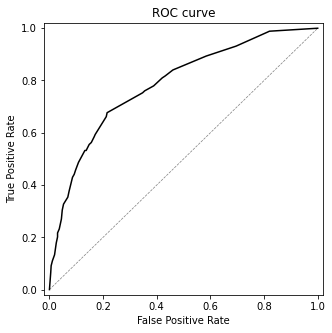

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10) #n_estimators = number of trees
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7662020779346589

In [ ]:
#If we repeat one more time, roc_auc_score changes because a random subset of features is selected each time
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7798067375457122

In [ ]:
#To understand how much it changes, lets loop over it 100 times and look at the mean and the standard deviation
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.783 +- 0.008
0.775 -- 0.792


In [ ]:
#Lets use random_state to make the result consistent
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

In [ ]:
#Now we'll check how AUC depends on the number of trees
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.815
50 -> 0.816
60 -> 0.817
70 -> 0.818
80 -> 0.818
90 -> 0.820
100 -> 0.819
110 -> 0.819
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.820
160 -> 0.820
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.820


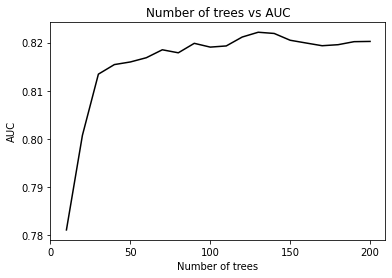

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

In [ ]:
#Tuninig the max_depth parameter
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.788
20 -> 0.798
30 -> 0.800
40 -> 0.800
50 -> 0.800
60 -> 0.801
70 -> 0.802
80 -> 0.803
90 -> 0.804
100 -> 0.804
110 -> 0.807
120 -> 0.806
130 -> 0.808
140 -> 0.807
150 -> 0.807
160 -> 0.807
170 -> 0.807
180 -> 0.807
190 -> 0.807
200 -> 0.807

depth: 10
10 -> 0.791
20 -> 0.808
30 -> 0.812
40 -> 0.818
50 -> 0.817
60 -> 0.819
70 -> 0.820
80 -> 0.820
90 -> 0.820
100 -> 0.821
110 -> 0.823
120 -> 0.823
130 -> 0.825
140 -> 0.824
150 -> 0.824
160 -> 0.825
170 -> 0.825
180 -> 0.825
190 -> 0.825
200 -> 0.825

depth: 20
10 -> 0.776
20 -> 0.803
30 -> 0.813
40 -> 0.817
50 -> 0.815
60 -> 0.813
70 -> 0.814
80 -> 0.815
90 -> 0.814
100 -> 0.815
110 -> 0.817
120 -> 0.816
130 -> 0.818
140 -> 0.818
150 -> 0.818
160 -> 0.818
170 -> 0.817
180 -> 0.817
190 -> 0.817
200 -> 0.818



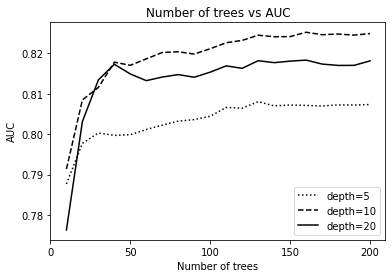

In [ ]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

In [ ]:
#Tuning the min_samples_leaf parameter
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.811
30 -> 0.823
50 -> 0.823
70 -> 0.822
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825

min_samples_leaf: 5
10 -> 0.813
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.822
110 -> 0.825
130 -> 0.825
150 -> 0.825
170 -> 0.825
190 -> 0.826

min_samples_leaf: 10
10 -> 0.810
30 -> 0.822
50 -> 0.822
70 -> 0.819
90 -> 0.820
110 -> 0.820
130 -> 0.821
150 -> 0.820
170 -> 0.820
190 -> 0.820



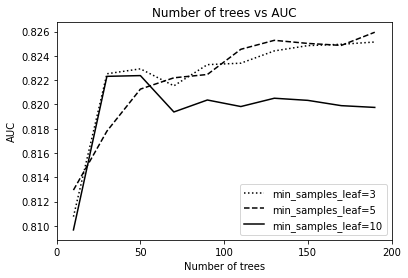

In [ ]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

**Final Model**

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8253826499721489

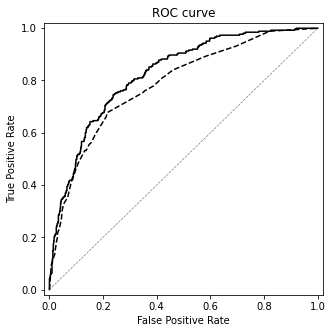

In [ ]:
#Decision tree VS Random forest model ROC curve

plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf) #Random forest predictions
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt) #Decision tree predictions
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

**XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [ ]:
xgb_params = {
    'eta': 0.3, #learning rate
    'max_depth': 6, #max depth of each tree
    'min_child_weight': 1, #minimum number of observations in each group. Same as min_samples_leaf
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10) #10 trees

In [ ]:
y_pred = model.predict(dval) #Predictions made for validation dataset
y_pred[:10]

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

In [ ]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

In [ ]:
#Model performance monitoring
watchlist = [(dtrain, 'train'), (dval, 'val')] #Output will be prefixed with "train" and "val"

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc', #metric we intend to watch
    'nthread': 8,
    'seed': 1
}

In [ ]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100, #100 trees
                  evals=watchlist, verbose_eval=10) #step by 10

[0]	train-auc:0.862996	val-auc:0.768179
[10]	train-auc:0.950021	val-auc:0.815577
[20]	train-auc:0.973165	val-auc:0.817748
[30]	train-auc:0.987718	val-auc:0.817875
[40]	train-auc:0.994562	val-auc:0.813873
[50]	train-auc:0.996881	val-auc:0.811282
[60]	train-auc:0.998887	val-auc:0.808006
[70]	train-auc:0.999439	val-auc:0.807316
[80]	train-auc:0.999847	val-auc:0.806771
[90]	train-auc:0.999915	val-auc:0.806371
[99]	train-auc:0.999975	val-auc:0.805457


In [ ]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [ ]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1]) #When we split, [0] = train-auc and [1] = the numeric value after train-auc
        val = float(val_line.split(':')[1]) #Same logic applies as noted above

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [ ]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

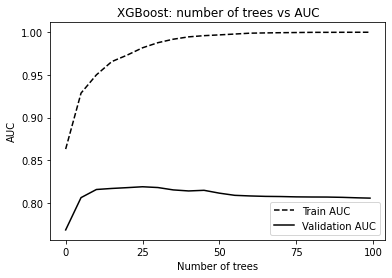

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()
#Overfitting

**Parameter tuning**

In [ ]:
#***eta (Learning rate)***
%%capture output

xgb_params = {
    'eta': 0.3, #eta = 0.3
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output) #parse_xgb_output returns tree array, aucs_train array, aucs_val array. we dont need aucs_train in this case. tree = number of trees as per the output of model above, aucs_train = training dataset auc, aucs_val = validation auc
print(max(aucs_val_eta_03)) #max value from the validation array
print(list(zip(aucs_val_eta_03, tree))) #zipped arrays
print(max(zip(aucs_val_eta_03, tree))) #max from auc for validation dataset. If "tree" is the first parameter of max|() function, it'll return 499


0.817875
[(0.768179, 0), (0.815577, 10), (0.817748, 20), (0.817875, 30), (0.813873, 40), (0.811282, 50), (0.808006, 60), (0.807316, 70), (0.806771, 80), (0.806371, 90), (0.805076, 100), (0.805269, 110), (0.804313, 120), (0.803949, 130), (0.802781, 140), (0.801842, 150), (0.801431, 160), (0.801231, 170), (0.801279, 180), (0.801388, 190), (0.800244, 200), (0.801328, 210), (0.80094, 220), (0.800026, 230), (0.801249, 240), (0.800238, 250), (0.800232, 260), (0.80048, 270), (0.800759, 280), (0.800728, 290), (0.800371, 300), (0.801037, 310), (0.800377, 320), (0.800232, 330), (0.80025, 340), (0.799802, 350), (0.799905, 360), (0.799735, 370), (0.799033, 380), (0.799263, 390), (0.798912, 400), (0.798912, 410), (0.798918, 420), (0.798331, 430), (0.798531, 440), (0.79844, 450), (0.798446, 460), (0.798282, 470), (0.798046, 480), (0.798537, 490), (0.798434, 499)]
(0.817875, 30)


In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, #eta = 0.1
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.824765
(0.824765, 70)


In [ ]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.822967
(0.822967, 120)


In [ ]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.821677
(0.821677, 499)


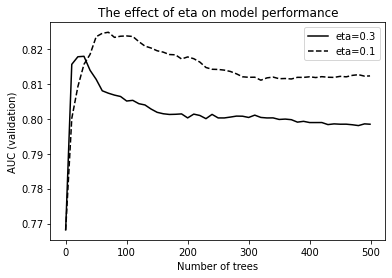

In [ ]:
plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

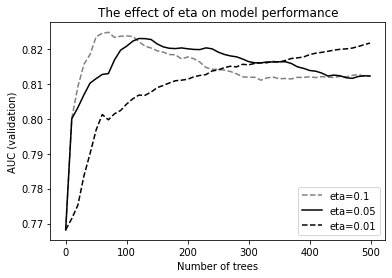

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta_2.svg')

plt.show()

In [ ]:
#***max_depth (The maximal allowed depth of each tree)***
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3, #max_depth = 3
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.836565
(0.836565, 180)


In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10, #max_depth = 10
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.818783
(0.811693, 100)


In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)
print(max(aucs_val_depth4))
print(max(zip(aucs_val_depth4, tree)))

0.830142
(0.830142, 80)


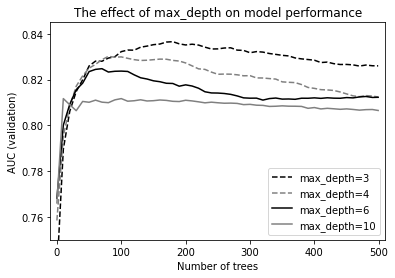

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth4, color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

In [ ]:
#***min_child_weight (The minimal number of observations in each group)***
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1, #min_child_weight = 1

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.830142
(0.830142, 80)


In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10, #min_child_weight = 10

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.833363
(0.833363, 150)


In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.835433
(0.835433, 160)


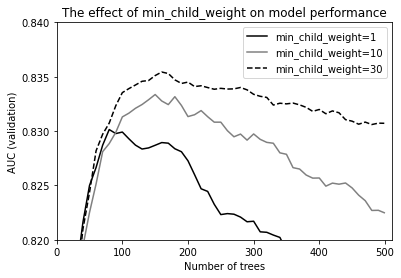

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

In [ ]:
#With all other parameters finalized, lets check the best number of trees, "num_boost_round"
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [ ]:
print(output)

[0]	train-auc:0.774243	val-auc:0.735705
[10]	train-auc:0.847331	val-auc:0.789639
[20]	train-auc:0.863589	val-auc:0.806168
[30]	train-auc:0.878555	val-auc:0.814778
[40]	train-auc:0.887011	val-auc:0.8199
[50]	train-auc:0.894582	val-auc:0.825946
[60]	train-auc:0.901587	val-auc:0.828065
[70]	train-auc:0.9065	val-auc:0.82801
[80]	train-auc:0.911104	val-auc:0.829403
[90]	train-auc:0.914279	val-auc:0.829972
[100]	train-auc:0.918013	val-auc:0.832212
[110]	train-auc:0.922045	val-auc:0.832902
[120]	train-auc:0.924598	val-auc:0.832848
[130]	train-auc:0.928431	val-auc:0.834144
[140]	train-auc:0.930997	val-auc:0.834628
[150]	train-auc:0.932957	val-auc:0.835252
[160]	train-auc:0.935513	val-auc:0.835536
[170]	train-auc:0.937885	val-auc:0.836384
[180]	train-auc:0.93971	val-auc:0.836565
[190]	train-auc:0.942029	val-auc:0.835621
[200]	train-auc:0.943343	val-auc:0.835124
[210]	train-auc:0.945014	val-auc:0.835458
[220]	train-auc:0.946934	val-auc:0.835076
[230]	train-auc:0.948392	val-auc:0.834168
[240]	tra

In [ ]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.836565


In [ ]:
max(zip(aucs_val, tree))

(0.836565, 180)

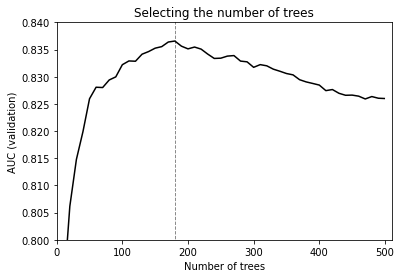

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(180, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

Final Model

In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=180, verbose_eval=10, #180 trees
                  evals=watchlist)

[0]	train-auc:0.774243	val-auc:0.735705
[10]	train-auc:0.847331	val-auc:0.789639
[20]	train-auc:0.863589	val-auc:0.806168
[30]	train-auc:0.878555	val-auc:0.814778
[40]	train-auc:0.887011	val-auc:0.8199
[50]	train-auc:0.894582	val-auc:0.825946
[60]	train-auc:0.901587	val-auc:0.828065
[70]	train-auc:0.9065	val-auc:0.82801
[80]	train-auc:0.911104	val-auc:0.829403
[90]	train-auc:0.914279	val-auc:0.829972
[100]	train-auc:0.918013	val-auc:0.832212
[110]	train-auc:0.922045	val-auc:0.832902
[120]	train-auc:0.924598	val-auc:0.832848
[130]	train-auc:0.928431	val-auc:0.834144
[140]	train-auc:0.930997	val-auc:0.834628
[150]	train-auc:0.932957	val-auc:0.835252
[160]	train-auc:0.935513	val-auc:0.835536
[170]	train-auc:0.937885	val-auc:0.836384
[179]	train-auc:0.939617	val-auc:0.836481


In [ ]:
y_pred_xgb = model.predict(dval)

In [ ]:
roc_auc_score(y_val, y_pred_xgb)

0.8364807100821002

In [ ]:
print(roc_auc_score(y_val, y_pred_dt)) #Decision tree model
print(roc_auc_score(y_val, y_pred_rf)) #Randmom forest model
print(roc_auc_score(y_val, y_pred_xgb)) #XGBoost model

0.7854738320699426
0.8253826499721489
0.8364807100821002


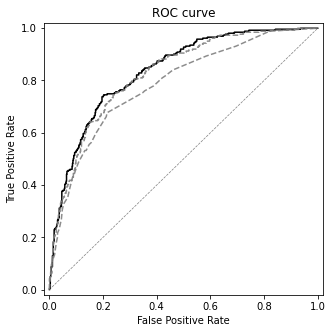

In [ ]:

plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb) #XGBoost model
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf) #Randmom forest model
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt) #Decision tree model
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

**Final test**

In [ ]:
#Notice that we are training the model on full training set that includes training and validation sets, as we dont need the validation dataset
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

In [ ]:
dict_train_full = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

In [ ]:
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf_final.fit(X_train_full, y_train_full)

y_pred_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 160

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

In [ ]:
y_pred_xgb = xgb_final.predict(dtest)

In [ ]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.8241777039245393
0.8322845901959826


# Feature Importance

**Decision trees**

In [ ]:
dt.feature_importances_

array([0.01387723, 0.04793733, 0.1226385 , 0.00833288, 0.0250906 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18724799, 0.00699145, 0.        ,
       0.        , 0.17292753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0302163 ,
       0.        , 0.24421676, 0.12152239, 0.01900104])

In [ ]:
list(zip(dv.feature_names_, dt.feature_importances_))

[('age', 0.013877231876069153),
 ('amount', 0.04793733336664824),
 ('assets', 0.12263850423922844),
 ('debt', 0.008332876385504902),
 ('expenses', 0.025090602575881322),
 ('home=ignore', 0.0),
 ('home=other', 0.0),
 ('home=owner', 0.0),
 ('home=parents', 0.0),
 ('home=private', 0.0),
 ('home=rent', 0.0),
 ('home=unk', 0.0),
 ('income', 0.18724798934476602),
 ('job=fixed', 0.006991445659436667),
 ('job=freelance', 0.0),
 ('job=others', 0.0),
 ('job=partime', 0.17292752964348085),
 ('job=unk', 0.0),
 ('marital=divorced', 0.0),
 ('marital=married', 0.0),
 ('marital=separated', 0.0),
 ('marital=single', 0.0),
 ('marital=unk', 0.0),
 ('marital=widow', 0.0),
 ('price', 0.030216298419676543),
 ('records=no', 0.0),
 ('records=yes', 0.24421675762093445),
 ('seniority', 0.12152238957522045),
 ('time', 0.019001041293152915)]

In [ ]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain']) #Note that the values of gain are calculated by feature_importances_() for each feature
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
26,records=yes,0.244217
12,income,0.187248
16,job=partime,0.172928
2,assets,0.122639
27,seniority,0.121522
1,amount,0.047937
24,price,0.030216
4,expenses,0.025091
28,time,0.019001
0,age,0.013877


In [ ]:
df_importance = df_importance[df_importance.gain > 0]

In [ ]:
df_importance.gain

26    0.244217
12    0.187248
16    0.172928
2     0.122639
27    0.121522
1     0.047937
24    0.030216
4     0.025091
28    0.019001
0     0.013877
3     0.008333
13    0.006991
Name: gain, dtype: float64

In [ ]:
df_importance.gain[::-1] #Note that this syntax just reverses the list

13    0.006991
3     0.008333
0     0.013877
28    0.019001
4     0.025091
24    0.030216
1     0.047937
27    0.121522
2     0.122639
16    0.172928
12    0.187248
26    0.244217
Name: gain, dtype: float64

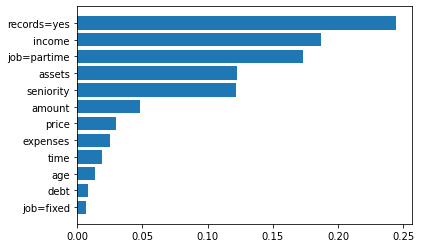

In [ ]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1]) #Reverse the list
plt.yticks(range(num), df_importance.feature[::-1]) #Reverse the list

plt.show()

**Random forest**

In [ ]:
rf.feature_importances_

array([5.81509463e-02, 8.42444361e-02, 7.75901403e-02, 1.33739427e-02,
       3.62995916e-02, 1.26998064e-06, 5.25854792e-03, 2.57383446e-02,
       8.51497558e-03, 3.24437831e-03, 1.44619658e-02, 0.00000000e+00,
       1.50682384e-01, 4.78310889e-02, 9.96408243e-03, 2.85512508e-03,
       5.65260797e-02, 0.00000000e+00, 2.43128646e-04, 6.42996557e-03,
       1.68784119e-03, 6.67458246e-03, 0.00000000e+00, 1.97498337e-04,
       6.62193254e-02, 8.41683921e-02, 8.30420483e-02, 1.25453198e-01,
       3.11467205e-02])

In [ ]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,income,0.150682
27,seniority,0.125453
1,amount,0.084244
25,records=no,0.084168
26,records=yes,0.083042
2,assets,0.077590
24,price,0.066219
0,age,0.058151
16,job=partime,0.056526
13,job=fixed,0.047831


In [ ]:
df_importance = df_importance[df_importance.gain > 0.01]

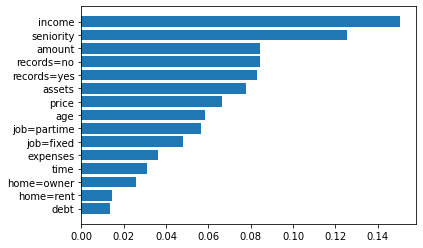

In [ ]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

**XGBoost**

In [ ]:
scores = model.get_score(importance_type='gain') #Returs a feature/gain key/value pair dictionary
scores = sorted(scores.items(), key=lambda x: x[1]) #items() just returns the "scores" dictionay's key/value pairs (See: https://www.w3schools.com/python/ref_dictionary_items.asp) and we sort them by item [1] i.e., value
list(reversed(scores))

[('records=no', 20.205886174933337),
 ('job=partime', 19.571840249333327),
 ('job=fixed', 14.703467482368419),
 ('home=owner', 12.168287986666668),
 ('seniority', 10.93204644173191),
 ('income', 8.676314024586466),
 ('assets', 5.918307806556342),
 ('amount', 5.400780562827161),
 ('time', 5.0175909627586215),
 ('home=parents', 4.499092019090908),
 ('home=rent', 4.028717651875),
 ('price', 3.7946846306606075),
 ('expenses', 3.589669993872826),
 ('age', 3.318183602467891),
 ('debt', 2.9418528487777773),
 ('marital=separated', 2.641880279076923),
 ('home=private', 2.4620430769999997),
 ('marital=married', 2.427789335636364),
 ('home=other', 2.3016982833333333),
 ('job=freelance', 2.25929752),
 ('job=others', 1.61876595),
 ('home=ignore', 0.7887506362000001)]

In [ ]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('price', 165),
 ('amount', 162),
 ('assets', 142),
 ('income', 133),
 ('seniority', 119),
 ('age', 109),
 ('expenses', 92),
 ('debt', 63),
 ('records=no', 60),
 ('time', 29),
 ('home=parents', 22),
 ('job=partime', 21),
 ('job=fixed', 19),
 ('marital=separated', 13),
 ('home=private', 12),
 ('marital=married', 11),
 ('home=rent', 8),
 ('home=owner', 6),
 ('home=ignore', 5),
 ('job=freelance', 4),
 ('home=other', 3),
 ('job=others', 1)]

In [ ]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

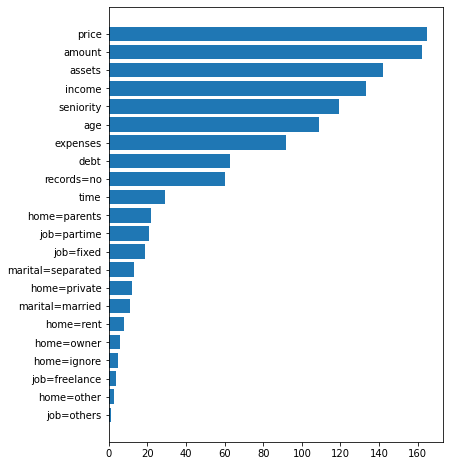

In [ ]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

# Extremely randomized trees

Picks a few candidate splits at random and then select the best one among them

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
aucs = []

for i in range(10, 201, 10):
    rf = ExtraTreesClassifier(n_estimators=i, max_depth=30)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.771
20 -> 0.784
30 -> 0.784
40 -> 0.795
50 -> 0.797
60 -> 0.792
70 -> 0.796
80 -> 0.793
90 -> 0.793
100 -> 0.793
110 -> 0.796
120 -> 0.793
130 -> 0.799
140 -> 0.797
150 -> 0.793
160 -> 0.794
170 -> 0.795
180 -> 0.795
190 -> 0.798
200 -> 0.791
